In [371]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import math
import datetime

In [372]:
stocks = ['PTT.BK']

# data 50 
data = wb.DataReader(stocks, 'yahoo', start='2018-10-4')['Adj Close']
data.reset_index(inplace=True,drop=False)
data

Symbols,Date,PTT.BK
0,2018-10-04,52.214817
1,2018-10-05,51.722225
2,2018-10-08,50.983334
3,2018-10-09,51.475925
4,2018-10-10,53.200001
5,2018-10-11,51.000000
6,2018-10-12,51.500000
7,2018-10-16,51.000000
8,2018-10-17,51.000000
9,2018-10-18,51.000000


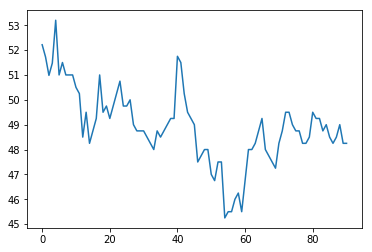

In [373]:
plt.plot(data['PTT.BK'])

In [374]:
# splited 60% train data, 20% cross validation and 20% test data

dataLength = len(data)
trainRage = int(dataLength * 0.6)
cvRage = int(dataLength * 0.8)
testRage = dataLength

trainData = data.iloc[0:trainRage]
cvData = data.iloc[trainRage:cvRage]
testData = data.iloc[cvRage:testRage]



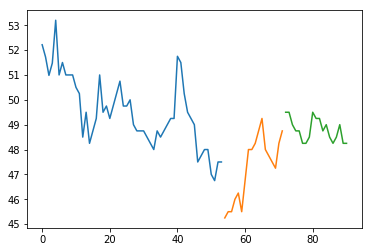

In [375]:
plt.plot(trainData['PTT.BK'])
plt.plot(cvData['PTT.BK'])
plt.plot(testData['PTT.BK'])

In [376]:
trainData , cvData, testData

(Symbols       Date     PTT.BK
 0       2018-10-04  52.214817
 1       2018-10-05  51.722225
 2       2018-10-08  50.983334
 3       2018-10-09  51.475925
 4       2018-10-10  53.200001
 5       2018-10-11  51.000000
 6       2018-10-12  51.500000
 7       2018-10-16  51.000000
 8       2018-10-17  51.000000
 9       2018-10-18  51.000000
 10      2018-10-19  50.500000
 11      2018-10-22  50.250000
 12      2018-10-24  48.500000
 13      2018-10-25  49.500000
 14      2018-10-26  48.250000
 15      2018-10-29  48.750000
 16      2018-10-30  49.250000
 17      2018-10-31  51.000000
 18      2018-11-01  49.500000
 19      2018-11-02  49.750000
 20      2018-11-05  49.250000
 21      2018-11-06  49.750000
 22      2018-11-07  50.250000
 23      2018-11-08  50.750000
 24      2018-11-09  49.750000
 25      2018-11-12  49.750000
 26      2018-11-13  50.000000
 27      2018-11-14  49.000000
 28      2018-11-15  48.750000
 29      2018-11-16  48.750000
 30      2018-11-19  48.750000
 31     

In [377]:
# xTrain = []
xTrain = np.ones((len(trainData),2),dtype=int)
xTrain[:,1] = trainData.index.tolist()
yTrain = np.array(trainData['PTT.BK'])
xTrain, yTrain

(array([[ 1,  0],
        [ 1,  1],
        [ 1,  2],
        [ 1,  3],
        [ 1,  4],
        [ 1,  5],
        [ 1,  6],
        [ 1,  7],
        [ 1,  8],
        [ 1,  9],
        [ 1, 10],
        [ 1, 11],
        [ 1, 12],
        [ 1, 13],
        [ 1, 14],
        [ 1, 15],
        [ 1, 16],
        [ 1, 17],
        [ 1, 18],
        [ 1, 19],
        [ 1, 20],
        [ 1, 21],
        [ 1, 22],
        [ 1, 23],
        [ 1, 24],
        [ 1, 25],
        [ 1, 26],
        [ 1, 27],
        [ 1, 28],
        [ 1, 29],
        [ 1, 30],
        [ 1, 31],
        [ 1, 32],
        [ 1, 33],
        [ 1, 34],
        [ 1, 35],
        [ 1, 36],
        [ 1, 37],
        [ 1, 38],
        [ 1, 39],
        [ 1, 40],
        [ 1, 41],
        [ 1, 42],
        [ 1, 43],
        [ 1, 44],
        [ 1, 45],
        [ 1, 46],
        [ 1, 47],
        [ 1, 48],
        [ 1, 49],
        [ 1, 50],
        [ 1, 51],
        [ 1, 52],
        [ 1, 53]]),
 array([52.21481705, 51.72

Text(0.5,0,'date in train data')

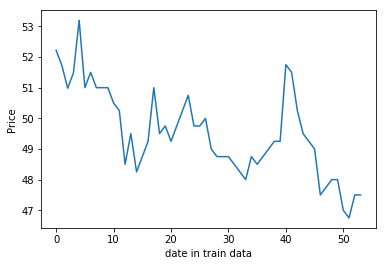

In [378]:
plt.plot(xTrain[:,1],yTrain)
plt.ylabel('Price')
plt.xlabel('date in train data')

In [379]:
def calCost(theta,x,y):
    m = len(y) 
    hypothesis = x.dot(theta)
    return (1/2*m) * np.sum(np.square(hypothesis - y))

def gradientDecent(x,y,theta,alpha=0.001,iteration=100):
    m = len(y)
    costHistory = np.zeros(iteration)
    thetaHistory = np.zeros((iteration,2))
    for i in range(iteration):
        hypothesis = np.dot(x,theta)
        theta = theta -(1/m)*alpha*(x.T.dot((hypothesis - y)))
        thetaHistory[i,:] = theta.T
        costHistory[i] = calCost(theta,x,y)
    return theta, costHistory, thetaHistory
    


Text(0.5,0,'hypothesis train data')

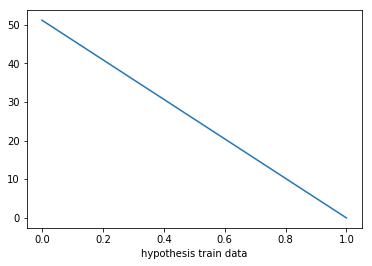

In [380]:
# default learning rate = 0.001
# default interation = 100
it = 90000
initTheta = np.array([1,1])

finalTheta, costHistory, thetaHistory = gradientDecent(xTrain,yTrain,initTheta,iteration=it)
plt.plot(finalTheta)
plt.xlabel('hypothesis train data')

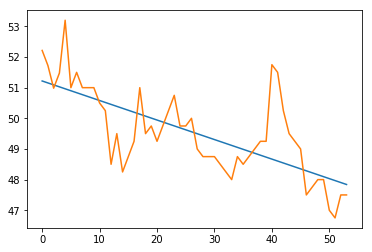

In [381]:
hypoLine = []

for i in range(len(xTrain)):
    hypoLine.append(finalTheta[0] + finalTheta[1] * xTrain[i,1])
plt.plot(hypoLine)
plt.plot(yTrain)

In [382]:
# CV
cvData.index.tolist()
xCv = np.ones((len(cvData),2),dtype=int)
xCv[:,1] = cvData.index.tolist()
yCv = np.array(cvData['PTT.BK'])
xCv, yCv

(array([[ 1, 54],
        [ 1, 55],
        [ 1, 56],
        [ 1, 57],
        [ 1, 58],
        [ 1, 59],
        [ 1, 60],
        [ 1, 61],
        [ 1, 62],
        [ 1, 63],
        [ 1, 64],
        [ 1, 65],
        [ 1, 66],
        [ 1, 67],
        [ 1, 68],
        [ 1, 69],
        [ 1, 70],
        [ 1, 71]]),
 array([45.25, 45.5 , 45.5 , 46.  , 46.25, 45.5 , 46.75, 48.  , 48.  ,
        48.25, 48.75, 49.25, 48.  , 47.75, 47.5 , 47.25, 48.25, 48.75]))

In [384]:
initTheta = np.array([1,1])
finalThetaCV, costHistoryCV, thetaHistoryCV = gradientDecent(xCv,yCv,initTheta,iteration=10)
finalThetaCV
# hypoLine = []



array([  199.17746078, 12472.2705012 ])

In [388]:
xCv
# for i in range(len(xCv)):
#     hypoLine.append(finalThetaCV[0] + finalThetaCV[1] * xCv[i,1])
# plt.plot(hypoLine)
# plt.plot(yCv)

array([[ 1, 54],
       [ 1, 55],
       [ 1, 56],
       [ 1, 57],
       [ 1, 58],
       [ 1, 59],
       [ 1, 60],
       [ 1, 61],
       [ 1, 62],
       [ 1, 63],
       [ 1, 64],
       [ 1, 65],
       [ 1, 66],
       [ 1, 67],
       [ 1, 68],
       [ 1, 69],
       [ 1, 70],
       [ 1, 71]])